필요한 패키지들을 import 시키는 작업 입니다.

In [1]:
import requests

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import  Rectangle
from PIL import Image
from io import BytesIO

Subscription Key 호출 URL을 셋팅 합니다

In [3]:
subscription_key = "f8990af1ac224652b702913fc5b2d637"
assert subscription_key

In [4]:
vision_base_url = "https://kmooc-vision.cognitiveservices.azure.com/vision/v2.0/"
ocr_url = vision_base_url + "ocr"

In [5]:
ocr_url

'https://kmooc-vision.cognitiveservices.azure.com/vision/v2.0/ocr'

분석할 이미지를 셋팅한다.

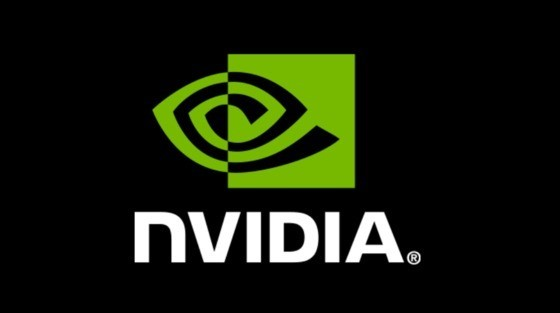

In [8]:
image_url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAxODExMTZfMjE0%2FMDAxNTQyMzU4MDY1OTE3.mke0JLFBO4jS-hJojejDruHQmJkV7b4gKs3oRfn7tdIg.1LxHXj9zP7M09hPrht0iW17TRKkmCAgV6kEjTgPtPDcg.JPEG%2FI1P4kSElZvKVehuLxO8qMBSTUkIU.jpg&type=sc960_832"

image = Image.open(BytesIO(requests.get(image_url).content))
image

헤더 정보를 셋팅한다.

In [9]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'unk', 'detectOrientation': 'true'}
data    = {'url': image_url}

서비스를 요청하고 결과를 확인한다.

In [10]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [11]:
analysis = response.json()

In [12]:
analysis

{'language': 'pt',
 'textAngle': -0.09599310885968748,
 'orientation': 'Up',
 'regions': [{'boundingBox': '140,202,274,74',
   'lines': [{'boundingBox': '140,202,274,74',
     'words': [{'boundingBox': '140,202,274,74', 'text': 'nViDIA'}]}]}]}

In [14]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '140,202,274,74', 'text': 'nViDIA'}]

(-0.5, 559.5, 312.5, -0.5)

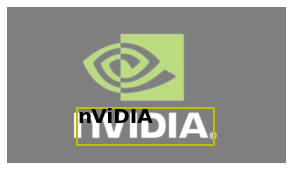

In [15]:
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")

한글이 잘되는지 테스트

In [17]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"

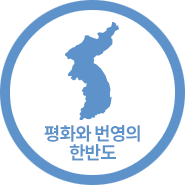

In [19]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [20]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'ko', 'detectOrientation': 'true'}
data    = {'url': image_url}

지원하는 언어목록
unk (AutoDetect)
zh-Hans (ChineseSimplified)
zh-Hant (ChineseTraditional)
cs (Czech)
da (Danish)
nl (Dutch)
en (English)
fi (Finnish)
fr (French)
de (German)
el (Greek)
hu (Hungarian)
it (Italian)
ja (Japanese)
ko (Korean)
nb (Norwegian)
pl (Polish)
pt (Portuguese,
ru (Russian)
es (Spanish)
sv (Swedish)
tr (Turkish)
ar (Arabic)
ro (Romanian)
sr-Cyrl (SerbianCyrillic)
sr-Latn (SerbianLatin)
sk (Slovak)

In [21]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [22]:
analysis = response.json()

In [23]:
analysis

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [24]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '45,125,46,17', 'text': '평화와'},
 {'boundingBox': '95,125,45,17', 'text': '번영의'},
 {'boundingBox': '70,144,46,17', 'text': '한반도'}]